## Empezar con nuevos datasets

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.io  


In [4]:
# definir la ruta del archivo .mat
file_path = r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\macaque47.mat"

# leer el contenido del archivo.mat
file_dict = scipy.io.loadmat(file_path)

In [5]:

file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 12:11:31 2007',
 '__version__': '1.0',
 '__globals__': [],
 'CIJ': array([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(47, 47), dtype=uint8),
 'Names': array(['1   ', '2   ', '35  ', '36  ', '46  ', '5   ', 'Id  ', 'VP  ',
        '3a  ', '3b  ', '4   ', '6   ', '7a  ', '7b  ', 'AITd', 'AITv',
        'CITd', 'CITv', 'DP  ', 'FEF ', 'FST ', 'Ig  ', 'LIP ', 'MDP ',
        'MIP ', 'MSTd', 'MSTl', 'MT  ', 'PIP ', 'PITd', 'PITv', 'PO  ',
        'Ri  ', 'SII ', 'SMA ', 'STPa', 'STPp', 'TF  ', 'TH  ', 'V1  ',
        'V2  ', 'V3  ', 'V3A ', 'V4  ', 'V4t ', 'VIP ', 'VOT '],
       dtype='<U4')}

In [8]:

# arreglo que contenga la variable CIJ
matriz = file_dict["CIJ"]

# otra con los nombres
columnas = file_dict["Names"]

In [9]:

matriz.shape, len(columnas)

((47, 47), 47)

In [10]:
# creamos un data frame que incluya la matriz y los nombres
macaco_df = pd.DataFrame(data = matriz, columns = columnas, index = columnas)

In [11]:
macaco_df.columns = [columna.split(sep = " ")[0] for columna in macaco_df.columns]

In [12]:

macaco_df.index = macaco_df.columns

In [13]:
macaco_df.columns

Index(['1', '2', '35', '36', '46', '5', 'Id', 'VP', '3a', '3b', '4', '6', '7a',
       '7b', 'AITd', 'AITv', 'CITd', 'CITv', 'DP', 'FEF', 'FST', 'Ig', 'LIP',
       'MDP', 'MIP', 'MSTd', 'MSTl', 'MT', 'PIP', 'PITd', 'PITv', 'PO', 'Ri',
       'SII', 'SMA', 'STPa', 'STPp', 'TF', 'TH', 'V1', 'V2', 'V3', 'V3A', 'V4',
       'V4t', 'VIP', 'VOT'],
      dtype='object')

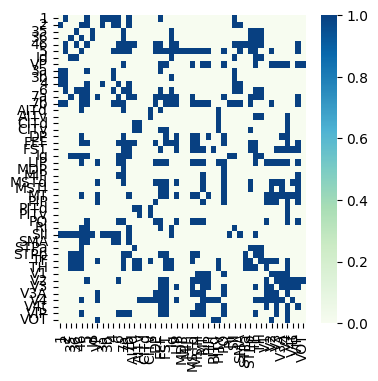

In [15]:
# generar el mapa de color del dataframe
plt.figure(figsize = (4,4))
ax = sns.heatmap(macaco_df.values, 
                 annot = False, cmap = "GnBu", fmt = ".2f",
                 xticklabels = macaco_df.columns, yticklabels = macaco_df.columns)
plt.show()

## Actividad:
1. filtrar el dataframe para quedarse con las columnas 15 a 35, y las filas 15 a 35
2. Mostrar el mapa de calor
3. Crear el grafo dirigido
4. calcular el grado del grafo

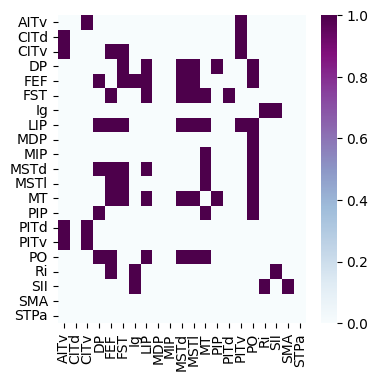

In [16]:

#1.
act = macaco_df.iloc[15:36, 15:36]

#2.
plt.figure(figsize = (4,4))
mapa = sns.heatmap(act.values, 
                 annot = False, cmap = "BuPu", fmt = ".2f",
                 xticklabels = act.columns, yticklabels = act.columns)
plt.show()

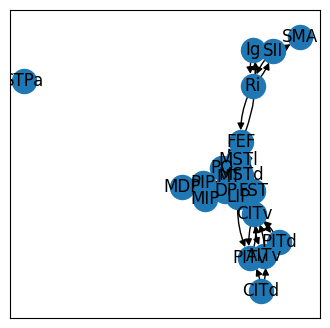

In [17]:
# 3.
plt.figure(figsize = (4,4))
G = nx.from_pandas_adjacency(act, create_using=nx.DiGraph)

pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos, with_labels = True, arrows = True, arrowstyle = "-|>", connectionstyle = "arc3, rad=0.15")

## Crear gráfico 3D, de la matriz completa

In [19]:
coord_path=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\macaco_M132_F99_LH.csv"

In [20]:
coord = pd.read_csv(coord_path)

coord.set_index("region", inplace = True, drop = True)
coord

,x,y,z
region,,,
V1,-13.2,-76.5,7.5
V2,-11.1,-70.4,10.2
V3,-9.3,-66.1,11.9
V3A,-12.8,-61.9,13.9
V4,-7.8,-57.8,13.1
V4t,-9.6,-54.7,11.8
MT,-22.4,-59.7,1.8
MSTd,-21.6,-53.1,13.6
MSTl,-20.9,-50.2,12.3


In [21]:
pos3D = {region : (coord.loc[region, "x"],
                 coord.loc[region, "y"],
                 coord.loc[region, "z"]) for region in coord.index}

In [22]:
G = nx.from_pandas_adjacency(macaco_df, create_using=nx.DiGraph)

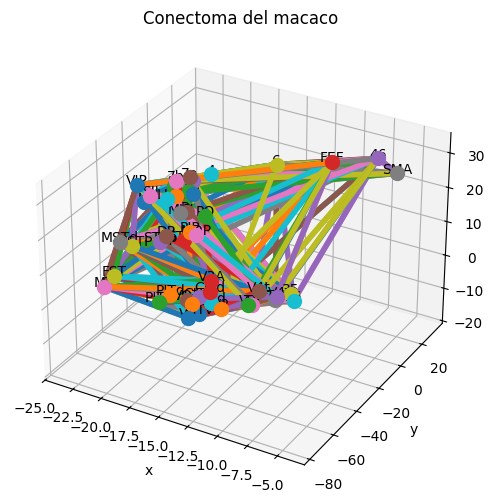

In [23]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection = "3d") # para poder hacerlo 3d, lo haremos usando subplots (111 --> define la "malla" de suplots en la que vamos a trabajar)

# agregar los nodos 
for region, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, region, fontsize = 10, ha="center")

# agregar las conexiones
for i, j, data in G.edges(data = True):
    x = [pos3D[i][0], pos3D[j][0]]
    y = [pos3D[i][1], pos3D[j][1]]
    z = [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth = data["weight"]*4)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Conectoma del macaco")

plt.show()